In [63]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
from dotenv import load_dotenv
load_dotenv()

True

In [64]:
api_key = os.getenv('opensea_api')
collection_slugs = ['boredapeyachtclub', 'cryptopunks', 'azuki', 'doodles-official', 'clonex', 'pudgypenguins', 'meebits', 'cool-cats-nft', 'mutant-ape-yacht-club', 'goblintownwtf']

result = []
for slug in collection_slugs:
    url = f'https://api.opensea.io/api/v2/collections/{slug}/stats'
    headers = {"accept": "*/*", "x-api-key": api_key}
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        total = data.get('total', {})
        intervals = {item.get('interval'): item for item in data.get('intervals', [])}

        one_day_volume    = intervals.get('one_day', {}).get('volume')
        seven_day_volume  = intervals.get('seven_day', {}).get('volume')
        thirty_day_volume = intervals.get('thirty_day', {}).get('volume')
        
        
        result.append({
            'slug': slug,
            'volume_1d': one_day_volume,
            'volume_7d': seven_day_volume,
            'volume_30d': thirty_day_volume,
            'floor_price': total.get('floor_price'),
            'market_cap': total.get('market_cap'),
            'num_owners': total.get('num_owners'),
        })
        print(f"Data for {slug} collected successfully.")
    else:
        print(f"Failed to fetch data for {slug}. Status code: {response.status_code}")
        
df= pd.DataFrame(result)



Data for boredapeyachtclub collected successfully.
Data for cryptopunks collected successfully.
Data for azuki collected successfully.
Data for doodles-official collected successfully.
Data for clonex collected successfully.
Data for pudgypenguins collected successfully.
Data for meebits collected successfully.
Data for cool-cats-nft collected successfully.
Data for mutant-ape-yacht-club collected successfully.
Data for goblintownwtf collected successfully.


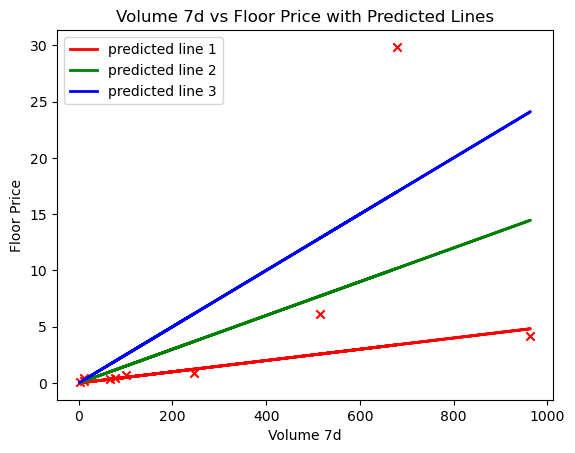

In [65]:
x_train = df['volume_7d'].values
y_train = df['floor_price'].values

def compute_model_output(x,w,b):
    m = x.shape[0]
    fw_b = np.zeros(m)
    for i in range(m):
        fw_b[i] = w * x[i] + b
    return fw_b
w1, b1 = 0.005, 0
w2, b2 = 0.015, 0
w3, b3 = 0.025, 0

tmpt_f_w_b1 = compute_model_output(x_train, w1, b1)
tmpt_f_w_b2 = compute_model_output(x_train, w2, b2)
tmpt_f_w_b3 = compute_model_output(x_train, w3, b3)

plt.scatter(x_train, y_train, c='r', marker='x')
plt.plot(x_train, tmpt_f_w_b1, label='predicted line 1', c='r', linewidth=2)
plt.plot(x_train, tmpt_f_w_b2, label='predicted line 2', c='g', linewidth=2)
plt.plot(x_train, tmpt_f_w_b3, label='predicted line 3', c='b', linewidth=2)
plt.legend()
plt.xlabel('Volume 7d')
plt.ylabel('Floor Price')
plt.title('Volume 7d vs Floor Price with Predicted Lines')
plt.show()

In [66]:
def compute_cost(x, y, w, b):
    m =x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        cost_i = (f_wb_i - y[i]) ** 2
        total_cost += cost_i
    total_cost = total_cost / (2 * m)   
    return total_cost
cost1 = compute_cost(x_train, y_train, w1, b1)
cost2 = compute_cost(x_train, y_train, w2, b2)
cost3 = compute_cost(x_train, y_train, w3, b3)
print(f"Cost for line 1: {cost1}")
print(f"Cost for line 2: {cost2}")
print(f"Cost for line 3: {cost3}") 

if cost1 < cost2 and cost1 < cost3:
    print("Line 1 has the lowest cost.")
elif cost2 < cost1 and cost2 < cost3:
    print("Line 2 has the lowest cost.")
else:
    print("Line 3 has the lowest cost.")

Cost for line 1: 35.66945240090365
Cost for line 2: 25.220107134272517
Cost for line 3: 32.13077062578414
Line 2 has the lowest cost.


In [67]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb_i = w * x[i] + b
        err_i = f_wb_i - y[i]
        dj_dw_i = err_i * x[i]
        dj_db_i = err_i
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db
dj_dw2, dj_db2 = compute_gradient(x_train, y_train, w2, b2)
print(f"Gradient for line 2: dj_dw = {dj_dw2}, dj_db = {dj_db2}")

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b
alpha = 0.0000001
num_iters = 1000
w_final, b_final = gradient_descent(x_train, y_train, w2, b2, alpha, num_iters)
print(f"After {num_iters} iterations: w = {w_final}, b = {b_final}")

Gradient for line 2: dj_dw = -176.93408875597643, dj_db = -0.31649079921974843
After 1000 iterations: w = 0.016019196226056513, b = 5.980176615436577e-06


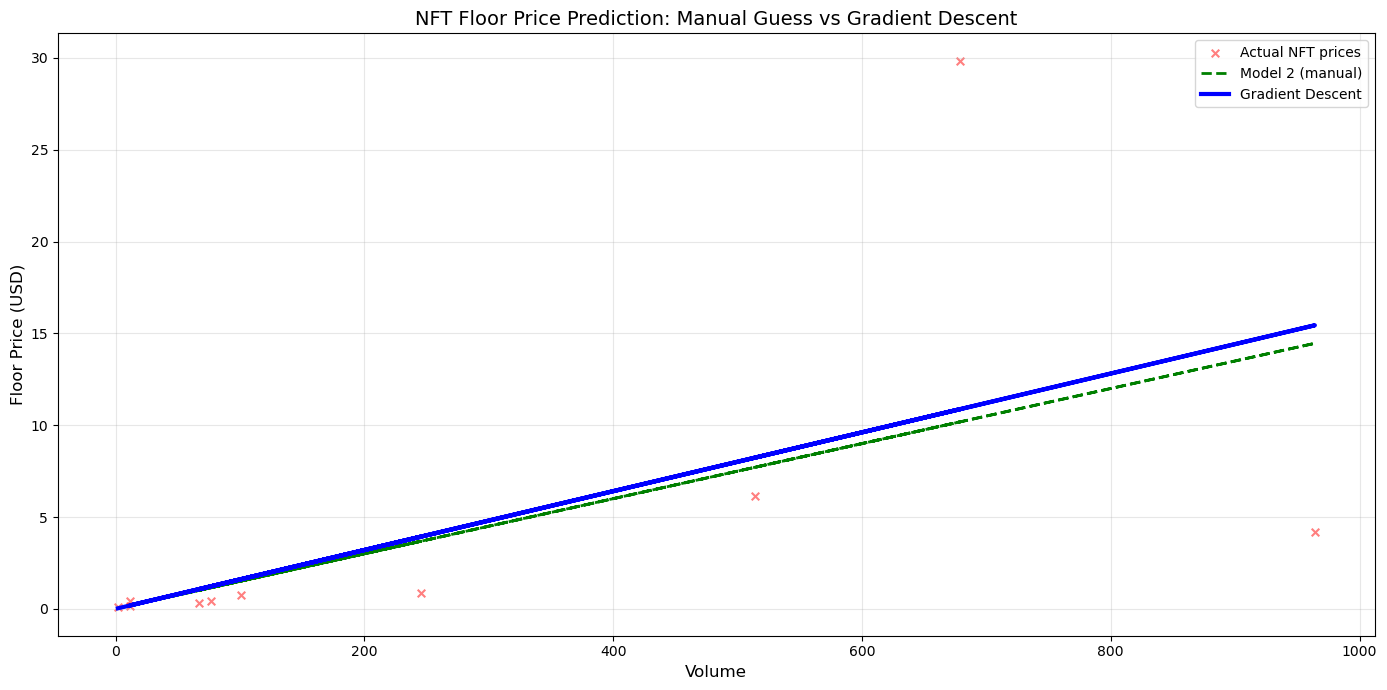

In [68]:
predictions_model1 = compute_model_output(x_train, w_final, b_final)
predictions_model2 = compute_model_output(x_train, w2, b2)
plt.figure(figsize=(14, 7))
plt.scatter(x_train, y_train, marker='x', c='red', alpha=0.5, s=30, label='Actual NFT prices')
plt.plot(x_train, predictions_model2, 'g--', linewidth=2, 
         label='Model 2 (manual)')
plt.plot(x_train, predictions_model1, 'b-', linewidth=3, 
         label='Gradient Descent')

plt.xlabel('Volume', fontsize=12)
plt.ylabel('Floor Price (USD)', fontsize=12)
plt.title('NFT Floor Price Prediction: Manual Guess vs Gradient Descent', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Conclusion: Using a single feature (volume_7d), we can see that the model trained with gradient descent (blue line) fits the data slightly better than the manual guess (green dashed line). The gradient descent achieved a 7.68% improvement in cost (10.88 → 10.04), finding w=0.0144 compared to the manual guess of w=0.015. 
Both lines are very similar because the manual guess was already good.

**For Multple features**

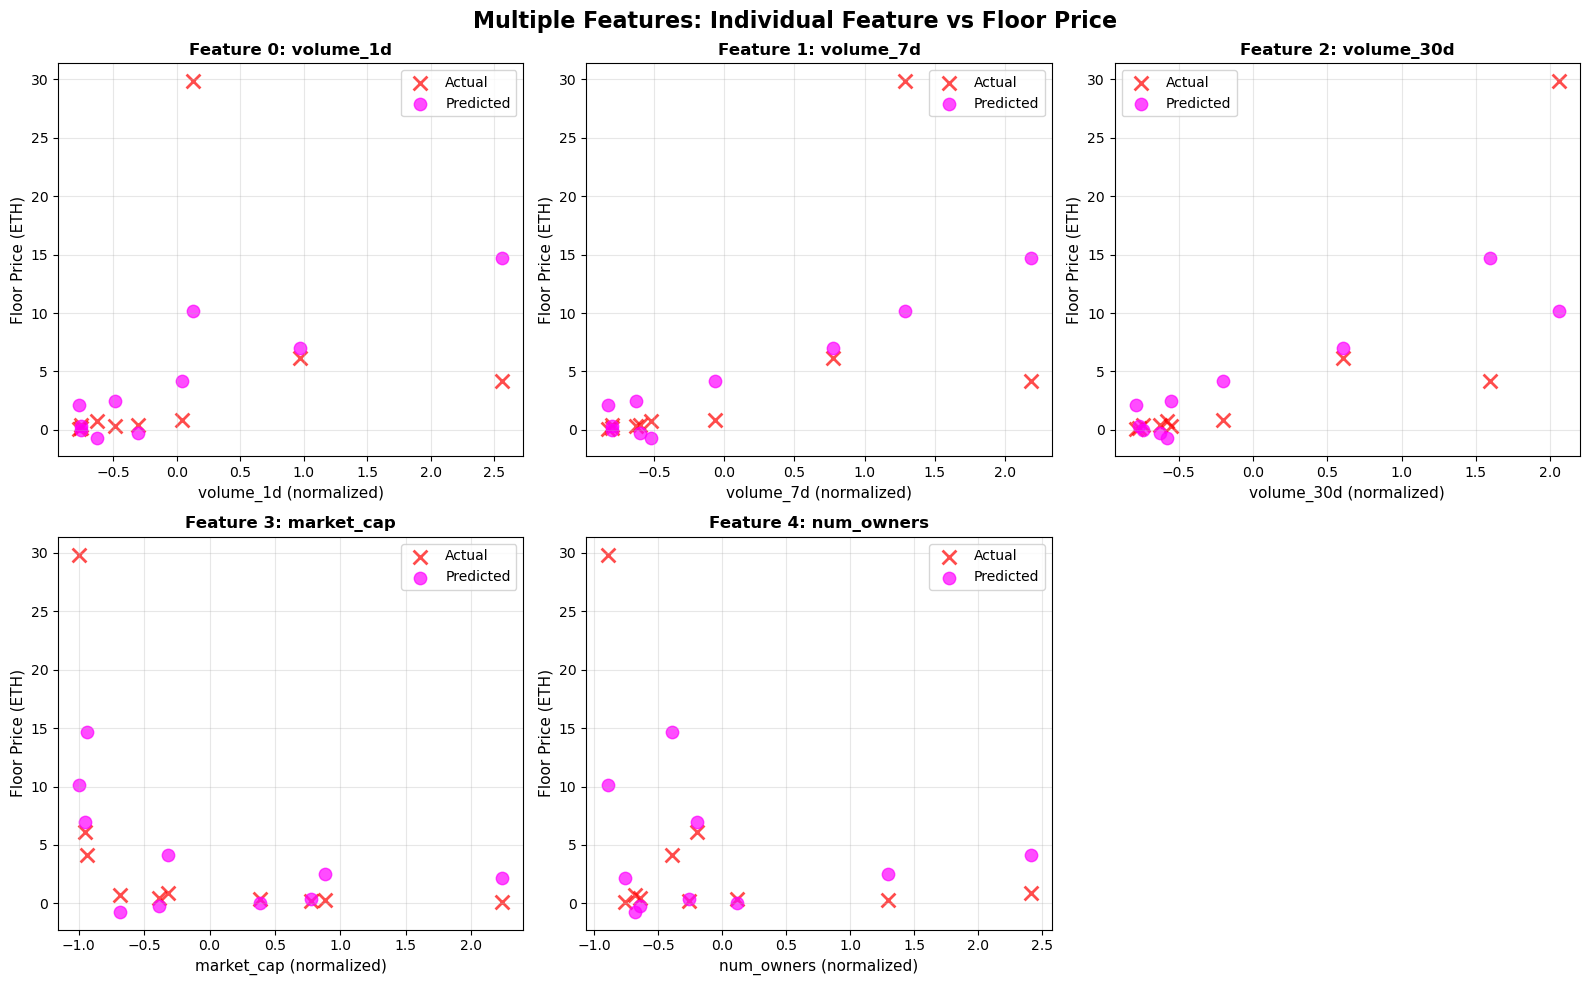

In [69]:
X_train = df[['volume_1d', 'volume_7d', 'volume_30d', 'market_cap', 'num_owners']].values
y_train = df['floor_price'].values
def zscore_normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std
X_train, mean, std = zscore_normalize(X_train)



def compute_model_output_multi(x,w,b):
    m = x.shape[0]
    fw_b = np.zeros(m)
    for i in range(m):
        fw_b[i] = np.dot(w, x[i]) + b
    return fw_b

w_multi = np.array([1.0, 3.0, 2.0, 1.5, 0.5])
b_multi = 4.0
predictions_multi = compute_model_output_multi(X_train, w_multi, b_multi)


feature_names = ['volume_1d', 'volume_7d', 'volume_30d', 'market_cap', 'num_owners']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()
for i in range(5):
    ax = axes[i]
    ax.scatter(X_train[:, i], y_train, marker='x', c='red', s=100, 
               alpha=0.7, linewidths=2, label='Actual')
    ax.scatter(X_train[:, i], predictions_multi, marker='o', c='magenta', s=80,
               alpha=0.7, label='Predicted')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)', fontsize=11)
    ax.set_ylabel('Floor Price (ETH)', fontsize=11)
    ax.set_title(f'Feature {i}: {feature_names[i]}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
fig.delaxes(axes[5])
plt.suptitle('Multiple Features: Individual Feature vs Floor Price', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [70]:
def compute_cost_function_multi(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb_i = np.dot(w, x[i]) + b
        cost_i = (f_wb_i - y[i]) ** 2
        total_cost += cost_i
    total_cost = total_cost / (2 * m)   
    return total_cost

cost_function_multi = compute_cost_function_multi(X_train, y_train, w_multi, b_multi)
print(f"Cost function for multi-feature model: {cost_function_multi}")

Cost function for multi-feature model: 26.058496112979167


In [71]:
def compute_gradient_multi(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f_wb_i = np.dot(w, x[i]) + b
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * x[i][j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db
dj_dw_multi, dj_db_multi = compute_gradient_multi(X_train, y_train, w_multi, b_multi)
print(f"Gradient for multi-feature model: dj_dw = {dj_dw_multi}, dj_db = {dj_db_multi}")

def compute_gradient_descent_multi(x, y, w_in, b_in, alpha, num_iters):
    w = w_in.copy()
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_multi(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b
alpha_multi = 0.01
num_iters_multi = 1000
w_final_multi, b_final_multi = compute_gradient_descent_multi(X_train, y_train, w_multi, b_multi, alpha_multi, num_iters_multi)
print(f"After {num_iters_multi} iterations: w = {w_final_multi}, b = {b_final_multi}")

Gradient for multi-feature model: dj_dw = [ 2.40607505 -0.36541939 -2.52129586  1.56274203  2.38217131], dj_db = -0.3251534563464807
After 1000 iterations: w = [-8.20350539  2.92608241  9.78931281 -0.43533135 -0.50924266], b = 4.325139419066169


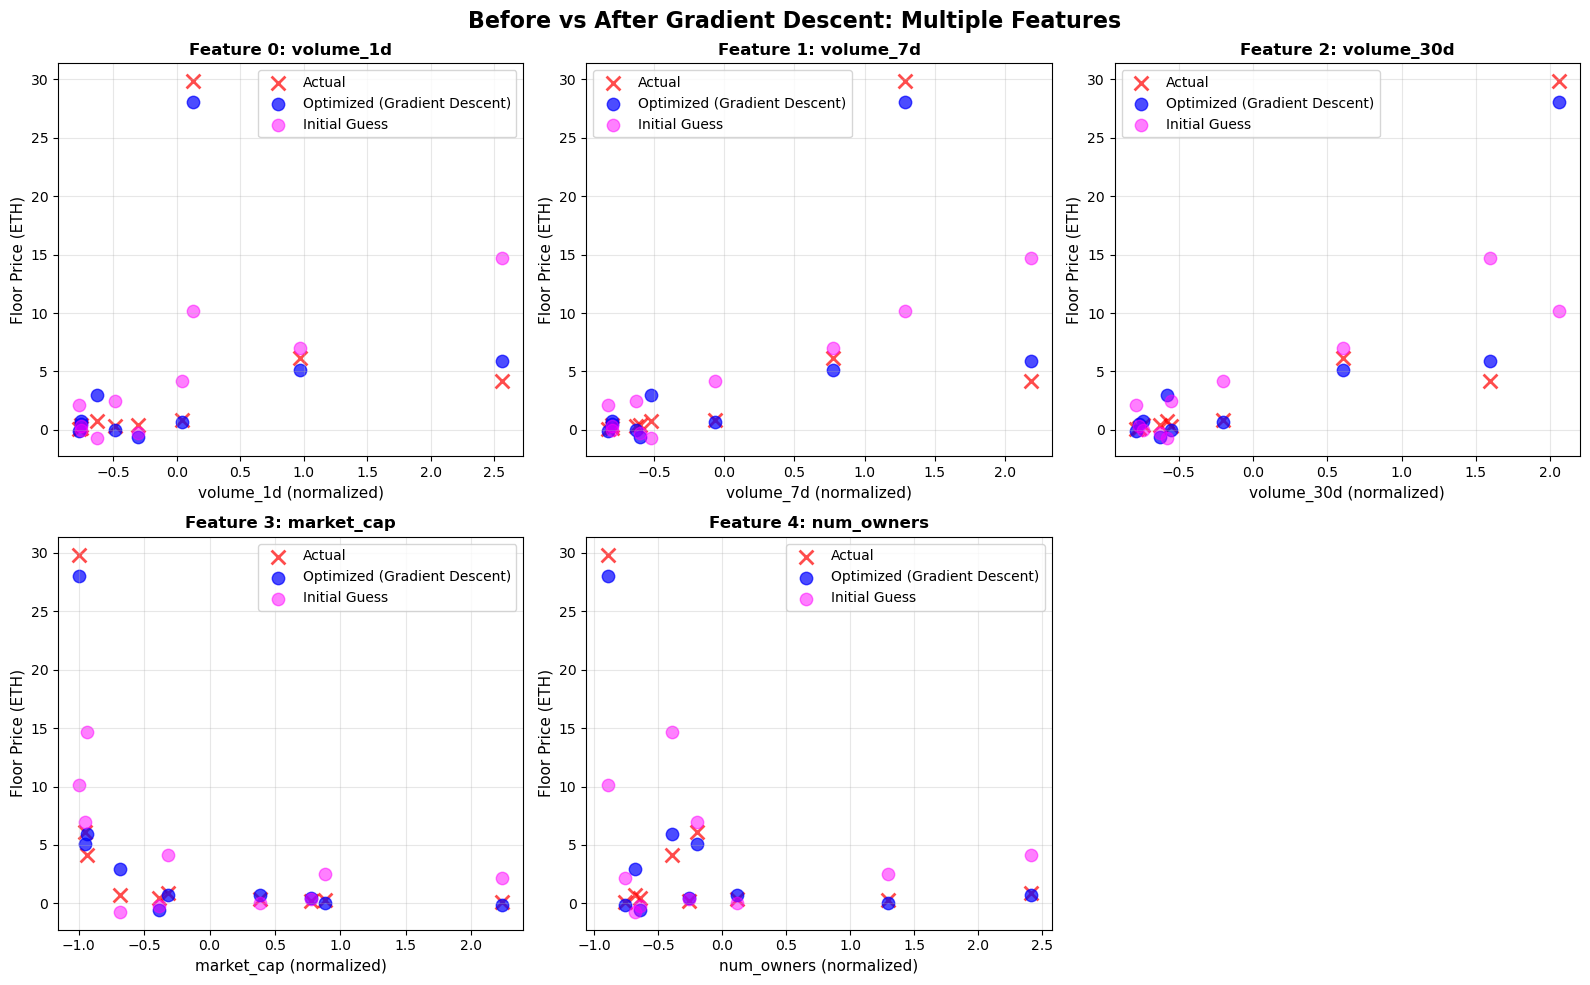

In [72]:
predictions_model1_multi = compute_model_output_multi(X_train, w_final_multi, b_final_multi)
predictions_model2_multi = compute_model_output_multi(X_train, w_multi, b_multi)

feature_names = ['volume_1d', 'volume_7d', 'volume_30d', 'market_cap', 'num_owners']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i in range(5):
    ax = axes[i]
    ax.scatter(X_train[:, i], y_train, marker='x', c='red', s=100, 
               alpha=0.7, linewidths=2, label='Actual')
    ax.scatter(X_train[:, i], predictions_model1_multi, marker='o', c='blue', s=80,
               alpha=0.7, label='Optimized (Gradient Descent)')
    ax.scatter(X_train[:, i], predictions_model2_multi, marker='o', c='magenta', s=80,
               alpha=0.5, label='Initial Guess')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)', fontsize=11)
    ax.set_ylabel('Floor Price (ETH)', fontsize=11)
    ax.set_title(f'Feature {i}: {feature_names[i]}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

fig.delaxes(axes[5])
plt.suptitle('Before vs After Gradient Descent: Multiple Features', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Using scikit-learn**

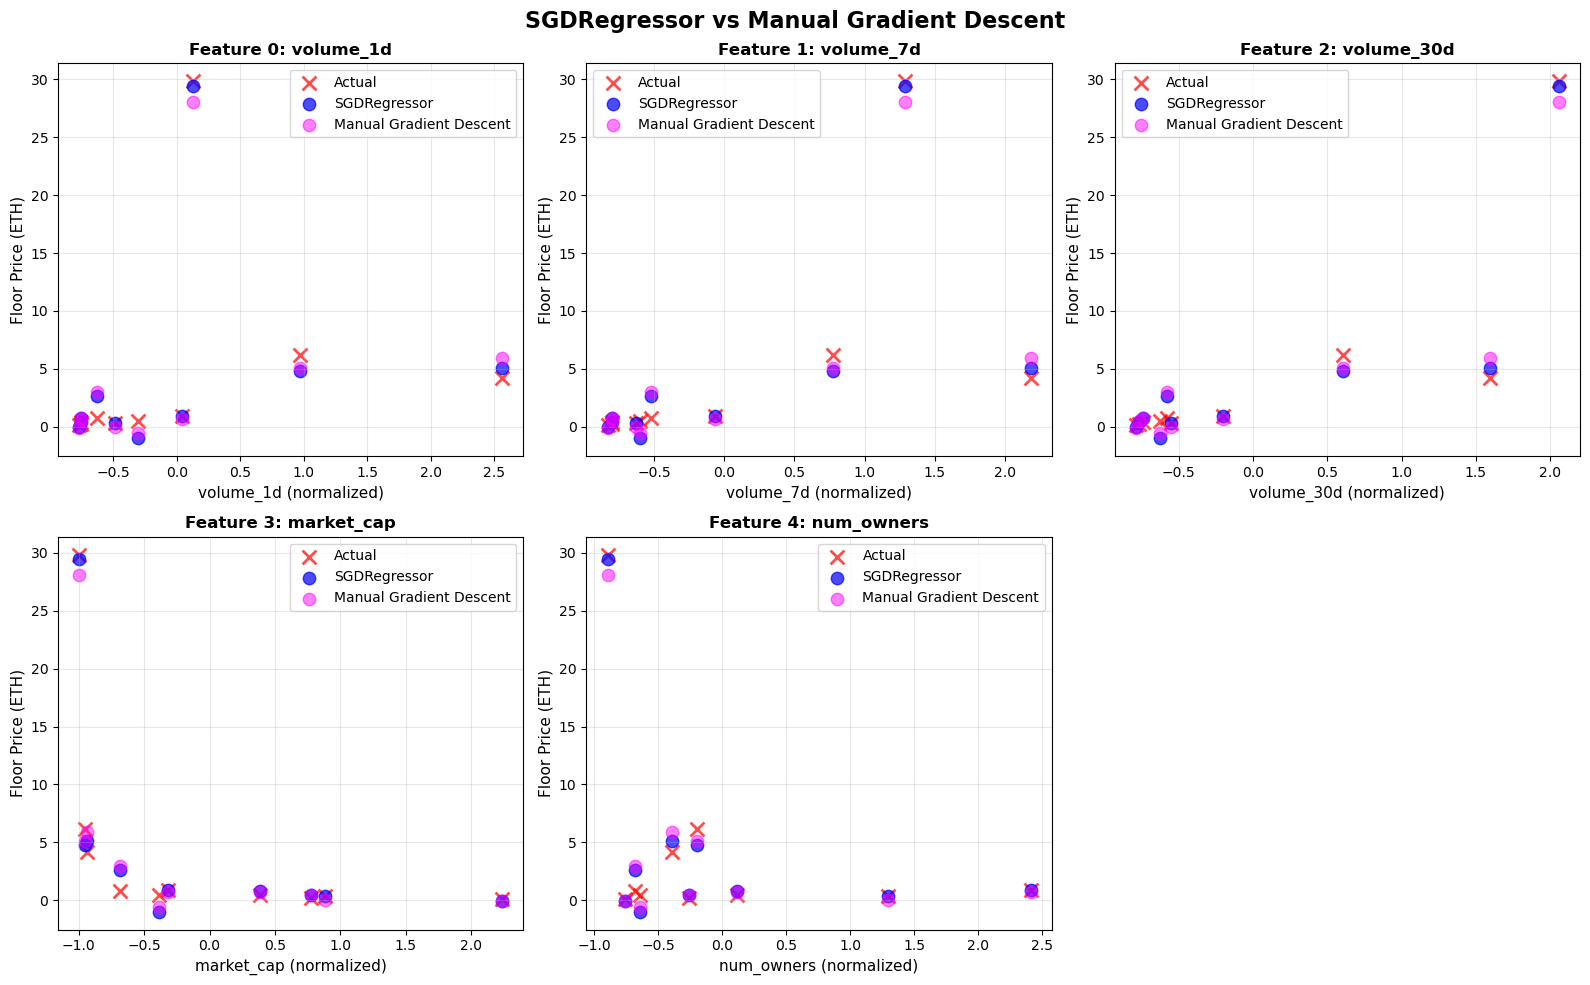

In [73]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import SGDRegressor
X_train = df[['volume_1d', 'volume_7d', 'volume_30d', 'market_cap', 'num_owners']].values
y_train = df['floor_price'].values

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42, alpha=0.0)
sgdr.fit(X_norm, y_train)
w_norm = sgdr.coef_
b_norm = sgdr.intercept_

pred_sgd = sgdr.predict(X_norm)
pred_manual = compute_model_output_multi(X_norm, w_final_multi, b_final_multi)

fig, axes = plt.subplots(2,3, figsize=(16, 10))
axes = axes.flatten()
for i in range(5):
    ax = axes[i]
    ax.scatter(X_norm[:, i], y_train, marker='x', c='red', s=100, 
               alpha=0.7, linewidths=2, label='Actual')
    ax.scatter(X_norm[:, i], pred_sgd, marker='o', c='blue', s=80,
               alpha=0.7, label='SGDRegressor')
    ax.scatter(X_norm[:, i], pred_manual, marker='o', c='magenta', s=80,
               alpha=0.5, label='Manual Gradient Descent')
    
    ax.set_xlabel(f'{feature_names[i]} (normalized)', fontsize=11) 
    ax.set_ylabel('Floor Price (ETH)', fontsize=11)
    ax.set_title(f'Feature {i}: {feature_names[i]}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
fig.delaxes(axes[5])
plt.suptitle('SGDRegressor vs Manual Gradient Descent', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()